In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
os.chdir("/content/drive/My Drive/AIMOOC")

import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive/


To solidify your understanding of the concepts taught in this module, you will be exploring a new dataset that tracks how long 5 people take to get food each day in a buffet line, measured over 60 days. The data was collected in the following way. One person monitors the buffet line and is supposed to let people go through one at a time. As soon as the first diner starts getting food, you start a timer. When the first diner stops getting food, you stop the timer. At this point, the monitor lets the next diner start getting food and you start the timer again. When the next diner finishes getting food, you stop the timer. The process repeats as the monitor lets the next diner go, and continues until all 5 diners have gotten their food. At some point during the 5 diners getting their food, it is possible that the buffet trays need to be refilled. The time it takes to refill the trays is recorded. The dataset we provide includes:

* the day the timing was done
* how long person1 took to get their food (minutes)
* how long person2 took to get their food (minutes)
* how long person3 took to get their food (minutes)
* how long person4 took to get their food (minutes)
* how long person5 took to get their food (minutes)
* how inaccurate the timer measurement is (minutes): for example, you may have started/stopped the timer not exactly as the person started/stopped getting food.
* how long it took to refill buffet trays (minutes)
* how inaccurate the monitor was at letting diners go (minutes): for example, the monitor might not have noticed that a diner finished getting food and waited too long to let the next one go, or that the monitor thought a diner finished getting food (but was not) and let the next diner go too early.

In [ ]:
df = pd.read_csv("/content/drive/My Drive/AIMOOC/Modules/Module3/Data/buffet_dinner.csv")
df

,day,person1,person2,person3,person4,person5,noise1,noise2,noise3
0,1,0.1,0.7,4.1,0.3,5.0,-0.1,1.0,-0.9
1,2,0.1,2.1,6.4,1.7,4.2,-0.5,0.9,-1.3
2,3,0.3,2.9,5.4,0.2,4.6,-0.2,0.9,-0.1
3,4,0.6,2.9,3.1,1.7,4.7,0.5,1.0,-0.2
4,5,0.7,2.5,4.1,0.3,4.5,0.0,0.9,-0.8
5,6,0.1,2.7,3.3,2.2,4.7,-0.2,1.0,1.2
6,7,0.8,5.5,2.1,1.5,5.0,-1.4,1.0,-2.5
7,8,0.6,3.0,3.6,1.1,4.8,0.7,1.0,0.9
8,9,0.9,4.7,1.2,2.7,4.9,-0.3,1.0,-1.1
9,10,0.2,4.9,4.3,0.7,4.7,0.5,1.1,-1.5


# Part 1

## Question 1

The following histograms bin the values for how long each person from our data takes to get their food. Decide whether the plot is most likely Gaussian or uniform.

Text(0.5, 1.0, 'person5 Histogram')

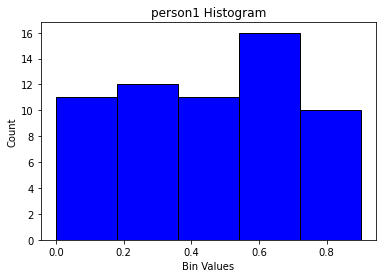

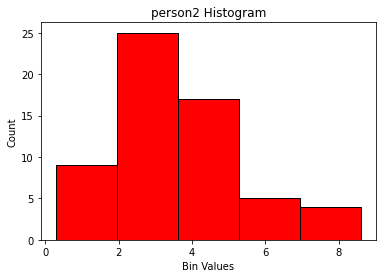

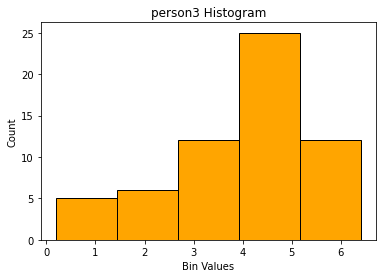

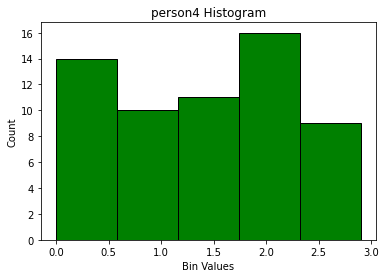

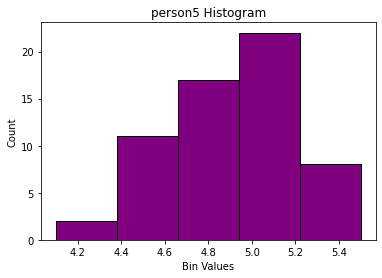

In [ ]:
import numpy as np
plt.figure()
plt.hist(df["person1"], bins=5, color="blue", edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Bin Values")
plt.title("person1 Histogram")
plt.figure()
plt.hist(df["person2"], bins=5, color="red", edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Bin Values")
plt.title("person2 Histogram")
plt.figure()
plt.hist(df["person3"], bins=5, color="orange", edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Bin Values")
plt.title("person3 Histogram")
plt.figure()
plt.hist(df["person4"], bins=5, color="green", edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Bin Values")
plt.title("person4 Histogram")
plt.figure()
plt.hist(df["person5"], bins=5, color="purple", edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Bin Values")
plt.title("person5 Histogram")


## Question 2

Use the plots from Question 1 to answer the following questions.

2-1. What is the probability that person5 takes between 3 and 6 minutes to serve themselves?

2-2. Estimate the probability that person2 takes between 2 and 3.8 minutes (i.e. the tallest bin in their histogram)?

2-3. What is the probability that person3 takes between -1 standard deviation and 1 standard deviation?

2-4. What is the probability that person1 will take more than 2 minutes?

2-5. Estimate the probability that person4 will take more than 1.8 minutes?

# Part 2

Now we will look at the noise information in our dataset. As a reminder: 

* noise1: how inaccurate the timer measurement is (minutes): for example, you may have started/stopped the timer not exactly as the person started/stopped getting food.
* noise2: how long it took to refill buffet trays (minutes)
* noise3: how inaccurate the monitor was at letting diners go (minutes): for example, the monitor might not have noticed that a diner finished getting food and waited too long to let the next one go, or that the monitor thought a diner finished getting food (but was not) and let the next diner go too early.

For this dataset, a standard deviation greater than 1 minute is considered large. 

## Question 1

For each of the noise columns in the dataset, find the mean and standard deviation. Round to one decimal point.

In [ ]:
# your code here

## Question 2

For each of the noise columns in the dataset, state whether it is biased or unbiased.

## Question 3

3-1. Choose the dataset columns that should be included in a calculation for the time it takes until everyone can start eating, assuming that they only start eating once everyone has gotten their food.

* person1
* person2
* person3
* person4
* person5
* noise1
* noise2
* noise3

3-2. Predict how many minutes it takes for everyone to start eating on day 14. Round to 1 decimal point.